<a href="https://colab.research.google.com/github/ganeshbmc/markets/blob/master/nifty_vix_daily.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas_ta
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 KB 3.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pandas_ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218921 sha256=f86165d142e5e5079a88e1b2d87211f91039584eeba36860cb7a5ba4b3f85952
  Stored in directory: /root/.cache/pip/wheels/1e/5c/47/759b32beb377aee150eb4c1f1b2b7635032cc19ea09ce076fd
Successfully built pandas_ta
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd
import numpy as np
import pandas_ta as ta
# import talib
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import math as m

print("Imported necessary libraries")

Imported necessary libraries


In [20]:
dfd = pd.read_excel('/content/nifty_vix_daily_fy_22_23.xlsx').iloc[:, 1:]
dfw = pd.read_excel('/content/nifty_vix_weekly_fy_18_23.xlsx').iloc[:, 1:]
dfd.shape, dfw.shape

((249, 18), (261, 18))

In [21]:
dfd.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,points_move,abs_points_move,returns,indiavix,vix_chg,vix_change,exp_move_pct,exp_points_move,lower,upper,overshoot
244,2023-03-24,17076.199219,17109.449219,16917.349609,16945.050781,16945.050781,228000,-132.0,132.0,-0.007721,15.2400,1.35%,0.051760,1.132031,193.0,16884.0,17270.0,False
245,2023-03-27,16984.300781,17091.000000,16918.550781,16985.699219,16985.699219,218400,41.0,41.0,0.002399,15.4450,-2.23%,0.013451,1.190625,202.0,16743.0,17147.0,False
246,2023-03-28,17031.750000,17061.750000,16913.750000,16951.699219,16951.699219,238800,-34.0,34.0,-0.002002,15.1000,-9.75%,-0.022337,1.206641,205.0,16781.0,17191.0,False
247,2023-03-29,16977.300781,17126.150391,16940.599609,17080.699219,17080.699219,345900,129.0,129.0,0.007610,13.6275,-5.08%,-0.097517,1.179688,200.0,16752.0,17152.0,False
248,2023-03-31,17210.349609,17381.599609,17204.650391,17359.750000,17359.750000,263900,279.0,279.0,0.016337,NaN,NaN,0.000000,1.064648,182.0,16899.0,17263.0,True


In [22]:
dfw.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,points_move,abs_points_move,returns,indiavix,vix_chg,vix_change,exp_move_pct,exp_points_move,lower,upper,overshoot
256,2023-02-27,17428.599609,17644.750000,17255.199219,17594.349609,17594.349609,1607100,129.0,129.0,0.007360,12.1800,10.12%,-0.141346,2.478018,433.0,17033.0,17899.0,False
257,2023-03-06,17680.349609,17799.949219,17324.349609,17412.900391,17412.900391,1128100,-181.0,181.0,-0.010313,13.4125,10.10%,0.101190,2.127758,374.0,17220.0,17968.0,False
258,2023-03-13,17421.900391,17529.900391,16850.150391,17100.050781,17100.050781,1551600,-313.0,313.0,-0.017967,14.7675,3.20%,0.101025,2.343067,408.0,17005.0,17821.0,False
259,2023-03-20,17066.599609,17207.250000,16828.349609,16945.050781,16945.050781,935700,-155.0,155.0,-0.009064,15.2400,-15.12%,0.031996,2.579776,441.0,16659.0,17541.0,False
260,2023-03-27,16984.300781,17381.599609,16913.750000,17359.750000,17359.750000,1067000,415.0,415.0,0.024473,NaN,NaN,0.000000,2.662318,451.0,16494.0,17396.0,False


In [23]:
def add_day(df):
  df.insert(1, "day", df["Date"].dt.day_name())
  return

In [24]:
# add_day(dfd)

In [26]:
# add_day(dfw)

In [30]:
dfd.day.value_counts()

Friday       52
Monday       51
Wednesday    49
Thursday     49
Tuesday      48
Name: day, dtype: int64

In [29]:
dfw.day.value_counts()

Monday    261
Name: day, dtype: int64

In [32]:
dfd.shape

(249, 19)

In [36]:
dfd_thu = dfd.loc[dfd["day"] == "Thursday"]
dfd_thu.tail()

,Date,day,Open,High,Low,Close,Adj Close,Volume,points_move,abs_points_move,returns,indiavix,vix_chg,vix_change,exp_move_pct,exp_points_move,lower,upper,overshoot
224,2023-02-23,Thursday,17574.650391,17620.050781,17455.400391,17511.250000,17511.250000,240800,-43.0,43.0,-0.002452,15.0750,-5.90%,-0.032879,1.217773,214.0,17340.0,17768.0,False
229,2023-03-02,Thursday,17421.500000,17445.800781,17306.000000,17321.900391,17321.900391,310700,-129.0,129.0,-0.007392,12.9700,-6.09%,-0.001924,1.015234,177.0,17274.0,17628.0,False
233,2023-03-09,Thursday,17772.050781,17772.349609,17573.599609,17589.599609,17589.599609,262400,-165.0,165.0,-0.009282,12.7250,5.40%,0.022088,0.972656,173.0,17581.0,17927.0,False
238,2023-03-16,Thursday,16994.650391,17062.449219,16850.150391,16985.599609,16985.599609,349800,13.0,13.0,0.000792,16.2175,-8.94%,-0.004756,1.273047,216.0,16756.0,17188.0,False
243,2023-03-23,Thursday,17097.400391,17205.400391,17045.300781,17076.900391,17076.900391,219200,-75.0,75.0,-0.004373,14.4900,5.18%,-0.021442,1.156836,198.0,16954.0,17350.0,False


In [38]:
dfd_thu.shape

(49, 19)

<Axes: >

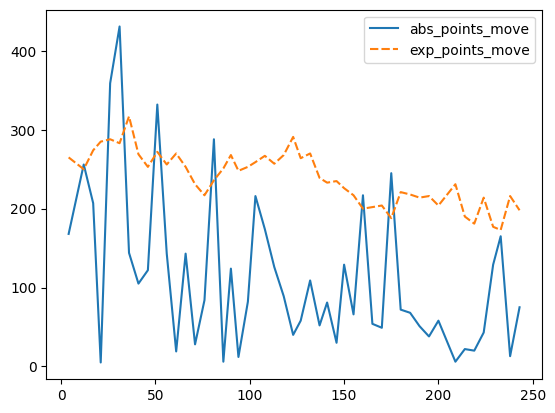

In [40]:
sns.lineplot(data=dfd_thu[["Date", "abs_points_move", "exp_points_move"]])

In [43]:
dfd_thu["overshoot"].value_counts()

False    42
True      7
Name: overshoot, dtype: int64

In [45]:
overshoot_pct = dfd_thu["overshoot"].value_counts()[True] / dfd_thu.shape[0]
overshoot_pct.round(2)

0.14